<a href="https://colab.research.google.com/github/bamirandab/bike-sharing/blob/develop/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip

--2023-02-28 15:38:27--  http://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.25MB/s    in 0.2s    

2023-02-28 15:38:28 (1.25 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [2]:
!unzip /content/Bike-Sharing-Dataset.zip

Archive:  /content/Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
day_df = pd.read_csv('/content/day.csv')
hour_df = pd.read_csv('/content/hour.csv')
hour_df['date'] = pd.to_datetime(hour_df.dteday)
hour_df.drop(['casual','registered','dteday','instant'], axis=1, inplace = True)

In [5]:
from datetime import datetime, timedelta

def get_cnt_minus_n(df, day, year, month, hour, n):
  t = datetime(year, month, day)
  t_minus_n = t - timedelta(n)
  try: 
    cnt_minus_n = df[(df['date'] == datetime(t_minus_n.year, t_minus_n.month, t_minus_n.day)) & (df['hr']==hour)]['cnt'].values[0]
  except:
    cnt_minus_n = np.nan
  return cnt_minus_n

hour_df['cnt_7']=hour_df.apply(lambda x: get_cnt_minus_n(hour_df, x['date'].day, x['date'].year, x['date'].month, x['hr'], 7), axis=1)
hour_df['cnt_1']=hour_df.apply(lambda x: get_cnt_minus_n(hour_df, x['date'].day, x['date'].year, x['date'].month, x['hr'], 1), axis=1)


In [6]:
cat_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit']

float_columns = ['temp',	'atemp',	'hum',	'windspeed', 'cnt_7', 'cnt_1']

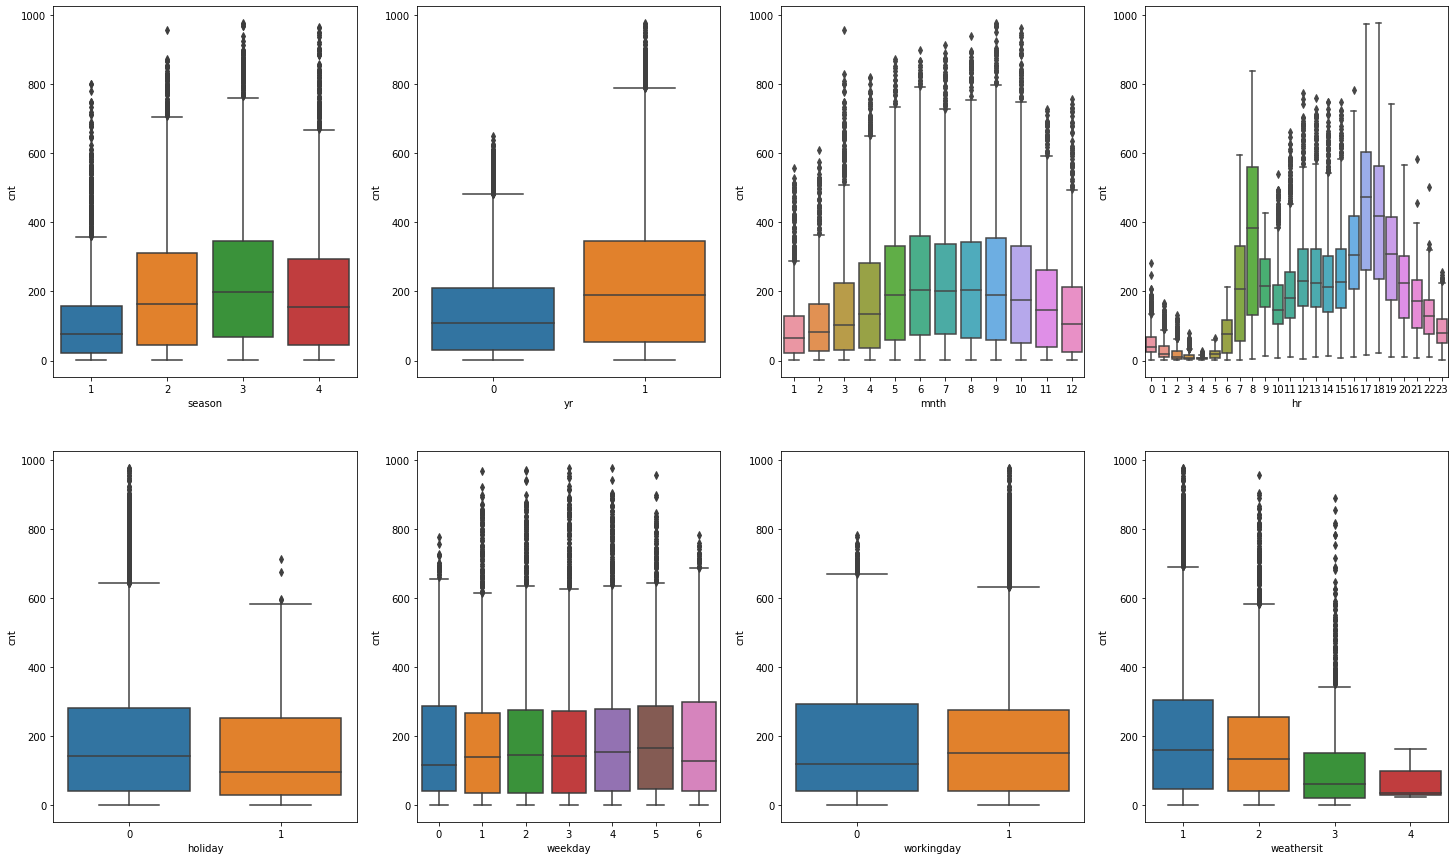

In [7]:
fig, ax = plt.subplots(2, 4, figsize=(25,15))

for i, col in enumerate(cat_columns):
  if i in [0,1,2,3]:
    row = 0
  else:
    row = 1
  sns.boxplot(data=hour_df, x=col, y='cnt',ax=ax[row, i % 4])

plt.show()

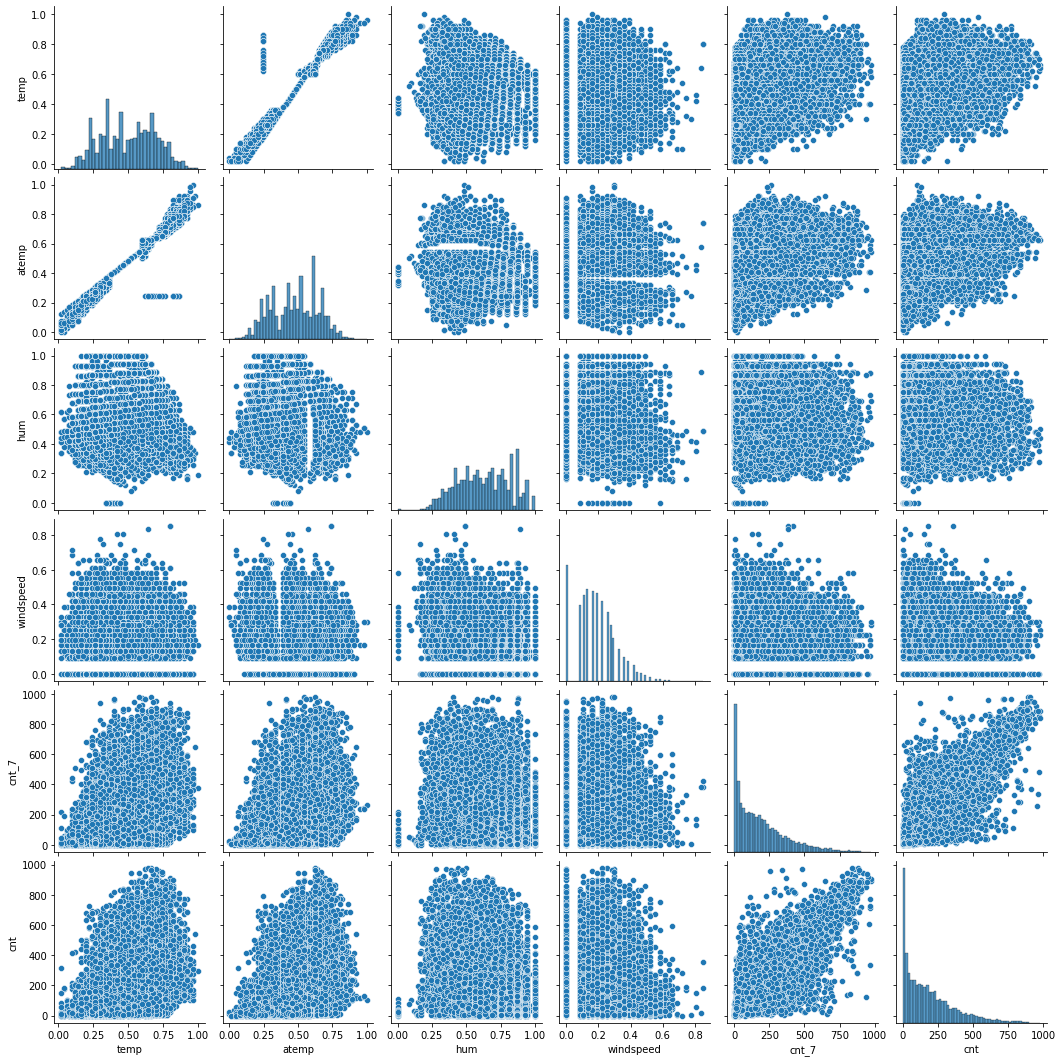

In [8]:
sns.pairplot(data=hour_df[float_columns + ['cnt']])

In [36]:
dummies_columns = ['season', 'mnth', 'hr', 'weekday', 'workingday',
       'weathersit']
       
hour_df[dummies_columns] = hour_df[dummies_columns].astype(str)
df_dummies = pd.get_dummies(hour_df[dummies_columns])
df = pd.concat([df_dummies, hour_df], axis= 1)
df.drop(dummies_columns, axis=1, inplace=True)
df.shape

(17379, 63)

In [18]:
X = df.drop(['cnt', 'date','cnt_7','cnt_1'],axis =1)

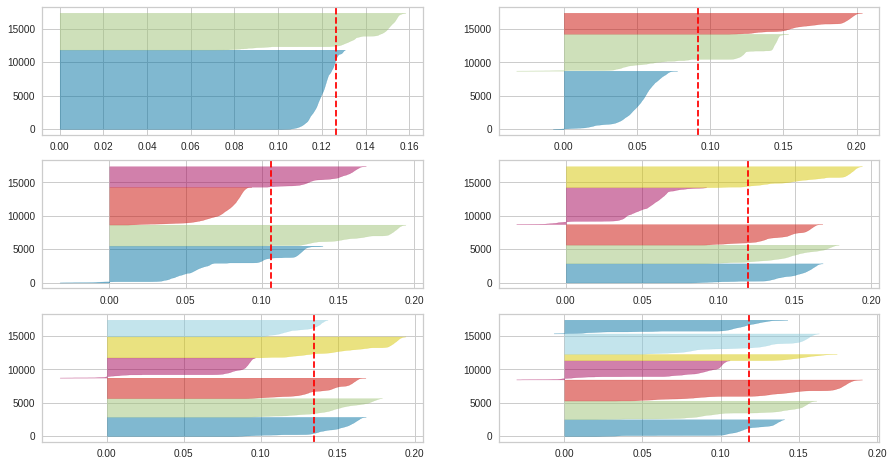

In [19]:
from sklearn import datasets 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
from yellowbrick.cluster import SilhouetteVisualizer 

# Cargue el conjunto de datos IRIS
  
fig, ax = plt.subplots( 3 , 2 , figsize=( 15 , 8 )) 
for i in [ 2 , 3 , 4 , 5 ,6 , 7]: 
    '''
    Crear instancias de KMeans para diferentes números de clústeres 
    '''
    km = KMeans(n_clusters=i, init= 'k-means++' , n_init= 10 , max_iter= 100 , random_state= 42 ) 
    q, mod = divmod (i, 2 ) 
    ''' 
    Crear una instancia de SilhouetteVisualizer con una instancia de KMeans 
    Ajustar el visualizador 
    '''
    visualizador = SilhouetteVisualizer(km, colors= 'yellowbrick' , ax=ax[q- 1 ][mod]) 
    visualizador.fit(X)

plt.show()


In [40]:
hour_df.drop('date',axis=1).to_csv('/content/train.csv', index=False)